## Data Analysis Project (GSS)

***

## Project Description

Since 1972, the General Social Survey (GSS) has been monitoring societal change and studying the growing complexity of American society. The GSS aims to gather data on contemporary American society in order to monitor and explain trends and constants in attitudes, behaviors, and attributes; to examine the structure and functioning of society in general as well as the role played by relevant subgroups; to compare the United States to other societies in order to place American society in comparative perspective and develop cross-national models of human society; and to make high-quality data easily accessible to scholars, students, policy makers, and others, with minimal cost and waiting.

GSS questions cover a diverse range of issues including national spending priorities, marijuana use, crime and punishment, race relations, quality of life, confidence in institutions, and sexual behavior.

Data: (3 points) Describe how the observations in the sample are collected, and the implications of this data collection method on the scope of inference (generalizability / causality).

Research question: (3 points) Come up with a research question that you want to answer using these data. You should phrase your research question in a way that matches up with the scope of inference your dataset allows for. You are welcomed to create new variables based on existing ones. Along with your research question include a brief discussion (1-2 sentences) as to why this question is of interest to you and/or your audience.

EDA: (10 points) Perform exploratory data analysis (EDA) that addresses the research question you outlined above. Your EDA should contain numerical summaries and visualizations. Each R output and plot should be accompanied by a brief interpretation.

Inference: (28 points) Perform inference that addresses the research question you outlined above. Each R output and plot should be accompanied by a brief interpretation.

### Data

GSS data is obtained in face-to-face interviews, Computer-assisted personal interviewing, also conducted by telephone.
There may be sections of people not interviewed for those who can't be reached via these means.

### Research question

Is there a relationship between respondents's self reported Educational qualification and their self reported Job Satisfaction?

### Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
from datetime import datetime, timedelta
import scipy.stats

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.option_context('float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("gss.csv")

In [3]:
df.head()

,caseid,year,age,sex,race,hispanic,uscitzn,educ,paeduc,maeduc,speduc,degree,vetyears,sei,wrkstat,wrkslf,marital,spwrksta,sibs,childs,agekdbrn,incom16,born,parborn,granborn,income06,coninc,region,partyid,polviews,relig,attend,natspac,natenvir,natheal,natcity,natcrime,natdrug,nateduc,natrace,natarms,nataid,natfare,natroad,natsoc,natmass,natpark,confinan,conbus,conclerg,coneduc,confed,conlabor,conpress,conmedic,contv,conjudge,consci,conlegis,conarmy,joblose,jobfind,satjob,richwork,jobinc,jobsec,jobhour,jobpromo,jobmeans,class,rank,satfin,finalter,finrela,unemp,govaid,getaid,union,getahead,parsol,kidssol,abdefect,abnomore,abhlth,abpoor,abrape,absingle,abany,pillok,sexeduc,divlaw,premarsx,teensex,xmarsex,homosex,suicide1,suicide2,suicide3,suicide4,fear,owngun,pistol,shotgun,rifle,news,tvhours,racdif1,racdif2,racdif3,racdif4,helppoor,helpnot,helpsick,helpblk
0,1,1972,23.0,Female,White,NaN,NaN,16.0,10.0,NaN,NaN,Bachelor,NaN,NaN,Working Fulltime,Someone Else,Never Married,NaN,3.0,0.0,NaN,Average,NaN,NaN,NaN,NaN,25926.0,E. Nor. Central,"Ind,Near Dem",NaN,Jewish,Once A Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Little Dissat,NaN,NaN,NaN,NaN,NaN,NaN,Middle Class,NaN,Not At All Sat,Better,Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,Not Wrong At All,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1972,70.0,Male,White,NaN,NaN,10.0,8.0,8.0,12.0,Lt High School,NaN,NaN,Retired,Someone Else,Married,Keeping House,4.0,5.0,NaN,Above Average,NaN,NaN,NaN,NaN,33333.0,E. Nor. Central,Not Str Democrat,NaN,Catholic,Every Week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Middle Class,NaN,More Or Less,Stayed Same,Above Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,Yes,No,Yes,Yes,NaN,NaN,NaN,NaN,Always Wrong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1972,48.0,Female,White,NaN,NaN,12.0,8.0,8.0,11.0,High School,NaN,NaN,Working Parttime,Someone Else,Married,Working Fulltime,5.0,4.0,NaN,Average,NaN,NaN,NaN,NaN,33333.0,E. Nor. Central,Independent,NaN,Protestant,Once A Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mod. Satisfied,NaN,NaN,NaN,NaN,NaN,NaN,Working Class,NaN,Satisfied,Better,Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,Always Wrong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1972,27.0,Female,White,NaN,NaN,17.0,16.0,12.0,20.0,Bachelor,NaN,NaN,Working Fulltime,Someone Else,Married,Working Fulltime,5.0,0.0,NaN,Average,NaN,NaN,NaN,NaN,41667.0,E. Nor. Central,Not Str Democrat,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very Satisfied,NaN,NaN,NaN,NaN,NaN,NaN,Middle Class,NaN,Not At All Sat,Stayed Same,Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,Always Wrong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once A Week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1972,61.0,Female,White,NaN,NaN,12.0,8.0,8.0,12.0,High School,NaN,NaN,Keeping House,Someone Else,Married,Temp Not Working,2.0,2.0,NaN,Below Average,NaN,NaN,NaN,NaN,69444.0,E. Nor. Central,Strong Democrat,NaN,Protestant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Working Class,NaN,Satisfied,Better,Above Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,Sometimes Wrong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57061 entries, 0 to 57060
Columns: 114 entries, caseid to helpblk
dtypes: float64(13), int64(2), object(99)
memory usage: 49.6+ MB


In [5]:
df.describe(include='all')

,caseid,year,age,sex,race,hispanic,uscitzn,educ,paeduc,maeduc,speduc,degree,vetyears,sei,wrkstat,wrkslf,marital,spwrksta,sibs,childs,agekdbrn,incom16,born,parborn,granborn,income06,coninc,region,partyid,polviews,relig,attend,natspac,natenvir,natheal,natcity,natcrime,natdrug,nateduc,natrace,natarms,nataid,natfare,natroad,natsoc,natmass,natpark,confinan,conbus,conclerg,coneduc,confed,conlabor,conpress,conmedic,contv,conjudge,consci,conlegis,conarmy,joblose,jobfind,satjob,richwork,jobinc,jobsec,jobhour,jobpromo,jobmeans,class,rank,satfin,finalter,finrela,unemp,govaid,getaid,union,getahead,parsol,kidssol,abdefect,abnomore,abhlth,abpoor,abrape,absingle,abany,pillok,sexeduc,divlaw,premarsx,teensex,xmarsex,homosex,suicide1,suicide2,suicide3,suicide4,fear,owngun,pistol,shotgun,rifle,news,tvhours,racdif1,racdif2,racdif3,racdif4,helppoor,helpnot,helpsick,helpblk
count,57061.000000,57061.000000,56859.000000,57061,57061,18920,770,56897.000000,40173.000000,46929.000000,29626.000000,56051,21884,31277.000000,57047,53549,57041,30697,55382.000000,56880.000000,18119.000000,43739,47804,47766,44996.000000,10070,51232.000000,57061,56734,47876,56828,47092,31227,31614,32081,29096,31781,31415,32255,30309,31427,31506,31758,37495,37360,35634,37741,35053,37175,37362,38222,37637,36504,37939,38312,38149,37102,35771,37614,37647,18772,18672,41277,21948,20572,20574,20571,20570,20568,53636,9854.000000,52454,52318,52115,35507,12085,1460,39378,34977,14827,14597,39216,39093,39384,39028,38981,39020,31807,20748,30680,32684,33548,21702,34019,32789,28826,29574,29504,29208,34295,34459,34219,34211,34211,35689,33855.000000,24086,24421,24459,23827,20166,19072,19327,19884
unique,NaN,NaN,NaN,2,3,28,4,NaN,NaN,NaN,NaN,5,5,NaN,8,2,5,8,NaN,NaN,NaN,6,2,9,NaN,26,NaN,9,8,7,13,8,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,3,4,2,5,5,5,5,5,5,NaN,3,3,5,2,2,2,4,4,5,6,2,2,2,2,2,2,2,4,3,3,4,4,4,5,2,2,2,2,2,3,3,3,3,5,NaN,2,2,2,2,3,3,3,3
top,NaN,NaN,NaN,Female,White,Not Hispanic,Not A U.S. Citizen,NaN,NaN,NaN,NaN,High School,None,NaN,Working Fulltime,Someone Else,Married,Working Fulltime,NaN,NaN,NaN,Average,Yes,Both In U.S,NaN,$60000 To 74999,NaN,South Atlantic,Not Str Democrat,Moderate,Protestant,Every Week,Too Much,Too Little,Too Little,Too Little,Too Little,Too Little,Too Little,About Right,About Right,Too Much,Too Much,About Right,Too Little,About Right,About Right,Only Some,Only Some,Only Some,Only Some,Only Some,Only Some,Only Some,A Great Deal,Only Some,Only Some,Only Some,Only Some,Only Some,Not Likely,Not Easy,Very Satisfied,Continue Working,Third,Fourth,Fifth,Second,Most Impt,Working Class,NaN,More Or Less,Stayed Same,Average,No,No,No,Neither Belongs,Hard Work,Much Better,Somewhat Better,Yes,No,Yes,No,Yes,No,No,Agree,Favor,More Difficult,Not Wrong At All,Always Wrong,Always Wrong,Always Wrong,Yes,No,No,No,No,No,No,No,No,Everyday,NaN,No,No,No,Yes,Agree With Both,Agree With Both,Agree With Both,No Special Treatment
freq,NaN,NaN,NaN,31915,46350,16936,378,NaN,NaN,NaN,NaN,29287,18093,NaN,28207,47352,30761,16815,NaN,NaN,NaN,21941,43705,39137,NaN,891,NaN,10977,12040,18494,33472,11383,14631,19259,21294,14842,21500,19555,20619,13744,13675,22286,15345,18954,21443,18264,22861,19659,22628,18958,21322,19535,20159,20346,17931,20484,19460,17796,21756,17998,11897,7687,19717,15383,6034,6516,10537,7082,9641,24458,NaN,23176,20654,25957,24517,7760,1179,32270,23022,4873,4228,31428,21848,35321,20557,31865,21779,18920,6459,26501,16382,14060,15165,25929,21601,15924,27097,26990,24629,20285,20144,26479,25432,25580,17023,NaN,14456,20987,12454,12765,12273,10874,8903,8656
mean,28531.000000,1992.084261,45.697955,NaN,NaN,NaN,NaN,12.753590,10.554004,10.713844,12.780328,NaN,NaN,48.423570,NaN,NaN,NaN,NaN,3.940053,1.952848,23.787130,NaN,NaN,NaN,1.154547,NaN,44503.038316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.772681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
df2 = df[["degree","jobmeans"]]

In [7]:
df2.head()

,degree,jobmeans
0,Bachelor,NaN
1,Lt High School,NaN
2,High School,NaN
3,Bachelor,NaN
4,High School,NaN


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57061 entries, 0 to 57060
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   degree    56051 non-null  object
 1   jobmeans  20568 non-null  object
dtypes: object(2)
memory usage: 891.7+ KB


In [9]:
df2.describe(include='all')

,degree,jobmeans
count,56051,20568
unique,5,5
top,High School,Most Impt
freq,29287,9641


## Data Visualization

### Univariate Data Exploration

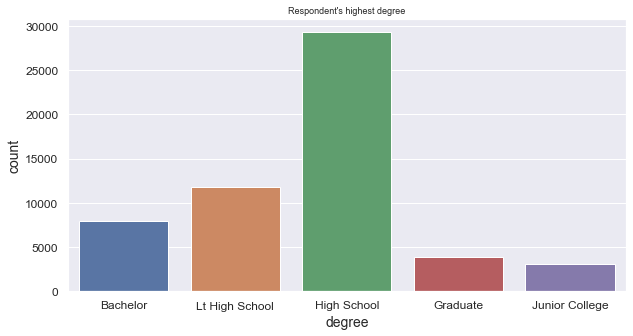

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(df2.degree)
plt.title("Respondent's highest degree")
plt.show()

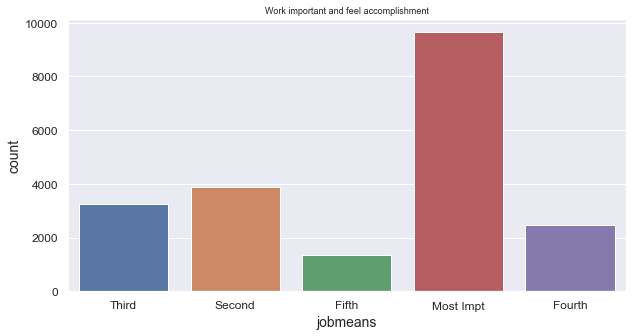

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(df2.jobmeans)
plt.title("Work important and feel accomplishment")
plt.show()

In [12]:
df2.groupby(["degree"])["jobmeans"].count()

degree
Bachelor           2465
Graduate           1203
High School       10561
Junior College      827
Lt High School     5052
Name: jobmeans, dtype: int64

In [13]:
df2.groupby(["jobmeans"])["degree"].count()

jobmeans
Fifth        1279
Fourth       2367
Most Impt    9481
Second       3821
Third        3160
Name: degree, dtype: int64

### Inference

The goal of hypothesis testing is to answer the question, “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?” The first step is to quantify the size of the apparent effect by choosing a test statistic (t-test, ANOVA, etc). The next step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real. Then compute the p-value, which is the probability of the null hypothesis being true, and finally interpret the result of the p-value, if the value is low, the effect is said to be statistically significant, which means that the null hypothesis may not be accurate.

### Chi-square test of independance

State the hypothesis:

-   $H_0:$ The proportion of educated people is independent of job satisfiction
-   $H_1:$ The proportion of educated people is associated with job satisfiction

In [14]:
#Create a Cross-tab table

cont_table  = pd.crosstab(df2['degree'], df2['jobmeans'])
cont_table

jobmeans,Fifth,Fourth,Most Impt,Second,Third
degree,,,,,
Bachelor,48,143,1580,430,264
Graduate,19,57,826,188,113
High School,621,1166,4943,2082,1749
Junior College,36,76,423,168,124
Lt High School,555,925,1709,953,910


In [15]:
chi_square = scipy.stats.chi2_contingency(cont_table, correction = True)

In [16]:
print(f"Chi score is", chi_square[0])

Chi score is 1183.1891554943559


In [17]:
print("P-value is", chi_square[1])

P-value is 6.0344633639231064e-242


In [18]:
print("Degrees of freedom is", chi_square[2])

Degrees of freedom is 16


Using 95% confidence level, p-value calculated is less than 0.05, therefore $H_0$ is rejected, $H_A$ is accepted.

There is a relationship between education level with job satisfaction